# surveygraph workshop
# ICSIH Preconference, Limerick, 2024

# Workshop schedule

Time|Detail
---|---
30min|Attitudes as a dynamical social field: introduction to this approach to analysing attitudes as networks
30min|R & igraph basics
10min|Break
30min|Converting surveys to graphs with surveygraph
30min|Thresholding & cluster detection
10min|Break
40min|Application to real data
17h00|End

# Acknowledgements

|||
|-|-|
| ![ERC Logo](https://erc.europa.eu/sites/default/files/inline-images/LOGO_ERC-FLAG_FP.png) | Development of surveygraph software and training materials was initially funded by the European Union under the ERC Proof-of-concept programme (ERC,  Attitude-Maps-4-All, project number: 101069264). Views and opinions expressed are however those of the author(s) only and do not necessarily reflect those of the European Union or the European Research Council Executive Agency. Neither the European Union nor the granting authority can be held responsible for them.   |
|||

## Our environment: a Jupyter notebook

In this workshop we will work through a Jupyter notebook.

This format allows us to combine sequences of text chunks (explanations) and code chunks (demonstrations). Once you have run all the code chunks, you have something like a markdown document which contains all the text, syntax and output in sequence.

You can run Jupyter notebooks on your own computer  (see [https://jupyter.org/](https://jupyter.org/)), but for convenience -- and internet allowing -- we will run them in Google Colab.

When you have a notebook open in Colab, it will have free cloud computing resources attached called a **kernel**, providing a small CPU, some disk space and memory. You can usually specify which language to use (R, Python etc). These resources are usually volatile -- they resources are assigned temporarily and the workspace will reset if you are away for a while.
**If this happens, you will have to re-run key code chunks (like loading libraries) before continuing.**

The chunk you are reading now is a **markdown chunk**. If you double click it you can see the source. There are some codes for headings, bold etc. that render on display.

**Code chunks** can be run by clicking the "play" arrow; they look like this (an image for demonstration only):

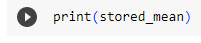

If you hover somewhere near the left of the chunk, you should see a clickable "play button." Click it to run the chunk.

The first time you run a code chunk there will be a delay while resources are assigned and a virtual machine is spun up.
Once a kernel is assigned, it will process the code  and display the output below.

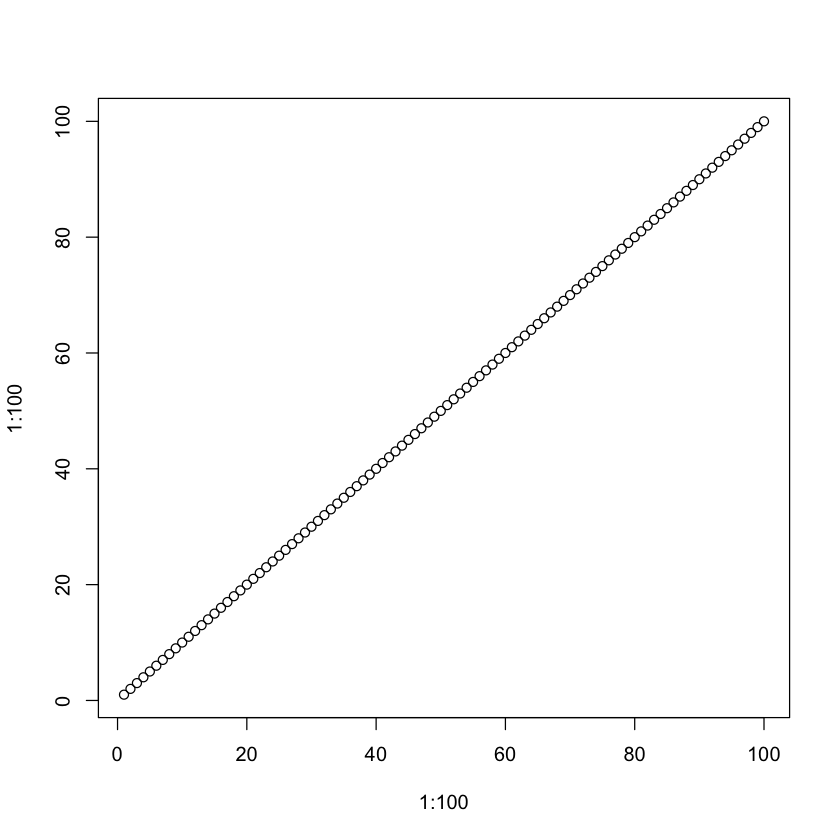

In [1]:
plot(1:100,1:100)
#Run this code chunk by clicking the "play" icon to the left.
#It will plot the sequence of integers from 1 to 100 on the X access against the same sequence on the Y axis.

Once you've run the chunk, the output is included in the notebook. You can reset the output using the menu options.

**Feel free to edit the code and run it again to see what happens. This will only affect your own workbook, and if you break anything, you can just refresh the browser and start again with a clean version.**

Once a kernel is assigned, there will be a resource monitor somewhere in the interface, showing the processor and memory useage. Some of the procedures we will run are computationally expensive, so might take a while to process. You can check the state of your virtual machine in the process monitor:


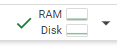
     

# R Basics

In this very short workshop we will assume that people have a basic knowledge of R.

If you don't, and want to learn more, there are many excellent free resources out there.

Two highly recommended books with excellent companion websites:

* Grolemund, G. (2014). Hands-on programming with R. O'Reilly. [Companion website.](https://rstudio-education.github.io/hopr/)
* Wickham, H., & Grolemund, G. (2016). R for data science: Import, tidy, transform, visualize, and model data (First edition). O’Reilly. [Companion Website.](https://r4ds.hadley.nz/)

### Packages
Base R has very limited functionality. For most tasks, you will need to load additional packages. These are libraries that provide a set of objects (functions, datasets etc.) that will be useful for a particular task.
Once you load a package, all the functions in the package will be available to you.



In this workshop we will use:
* Base R
* surveygraph to convert dataframes to networks
* igraph to manipulate and visualize networks
[Note: You could use any suitable network package to further analyze the networks]
Network

Analysis Process:||
---|---
Survey|
↓|
Preprocessing|
↓|
convert to networks with surveygraph()
Agent Layer|Symbolic layer
↓|↓
Visualize|Visualize
↓|↓
Detect communities|
↓|↓
Visualize|Visualize


In this workshop we will try to cover the basic skills required for this workflow.



## Load packages

To simplify the loading of packages, the first package we load is a library called pacman(). This will give us access to the function p_load() which allows us to load packages in one step. One of the benefits of pacman for working in a Jupyter notebook is that packages already in memory are not reloaded, saving time.

We then load **igraph** for working with networks.

We load them all in one code block for your convenience. This might take a while.

_Note_: In most environments (jupyter notebooks, Base R etc.), if the R session ends for any reason it will lose all memory of what you have been doing. In this case you will need to run this step again (e.g. after coming back from breaks).   

In [8]:
library("surveygraph")

## Getting information about objects
One of the most terrifying things about R for beginners is that objects are invisible and inscrutable: so you don't know automatically what objects exist and, even if you do, it's not clear from their names what they are or what their structure is. (And, for this reason, it is important to use meaningful and descriptive names for objects).

If you are using RStudio you can view the objects and their structure in various panels in the graphical interface. But if you are in a Jupyter notebook or base R you will need some commands.

### What objects exist?

`ls()` will list all of the objects in the working environment. Don't worry if there are objects you don't recognize: sometimes there are a few automatically generated ones, depending on the platform you are using. Of course, one of the advantages of scripting is that the names of the objects are also available in the script you have written, so more importantly:

## What is the structure of an object?
`str(object_name)` will summarize the structure of the object. e.g. Is it a character or integer? A vector or an array? This is especially useful for checking the structure of objects returned from functions.

Let's assign a new object and check that it appears in the environment:

In [2]:
a_new_variable <- "A character string"
ls()

[1] "a_new_variable"

 And report its structure:

In [3]:
str(a_new_variable)

 chr "A character string"


"chr" means that it is a variable composed of characters (rather than, for example, numbers).


## Working with vectors -- we really need this for igraph!

A lot of things in R are represented as vectors, which are simply sequences of elements, all of the same type.

The following sequence is a vector of numbers:

|||||
|---|---|---|---|
|1|2|3|4|


In R we can use the `c()` command to define a vector:



In [4]:
c(1,2,3,4)

[1] 1 2 3 4


The following is a vector of characters:

|||||
|---|---|---|---|
|"a"|"b"|"c"|"d"|


(Note that characters are captured "in quotes")


In [5]:
c("a","b","c","d")

[1] "a" "b" "c" "d"

We can select or drop items from a vector using their sequence index in [square brackets]

For example, the following will keep only the third value in the vector:


In [6]:
c("a","b","c","d")[3]

[1] "c"

And the following will keep everything **except** the first value in the sequence:

In [7]:
c("a","b","c","d")[-1]

[1] "b" "c" "d"

This syntax easily extends to selecting rows and/or columns from datasets. We will explore this functionality later.

But how do you get data into R in the first place?

# Load a sample dataset

Later we will be using data from the European Social Survey.
We have already downloaded it from their website and stored it in a location accessible via a URL. We will briefly show you the function they provide for data access, but to keep things simple here we just download from our URL.

To do so we use the command `read.csv()`


In [ ]:
# Load sample of ESS Round 10 participants:
# ESS_500: random sub-sample of 500 participants prepared for this workshop)

ESS_500 <- read.csv("https://www.dropbox.com/s/kotimfih8v0ys2t/ESS10_500.csv?dl=1")

# Select a subset of rows

To keep only cases from Great Britain in the ESS data, we use the square-bracket indexing syntax, which we now extend a bit.

Previously we were indexing a one-dimensional vector, so we could use [n] to index the nth item in the vector.

Now we have a data frame with two dimensions (rows, columns):
    `object_name[row{s}, column(s)]`

Note that a blank index is interpreted as "all" `[,1]` means "all rows and column one."
`[2,]` means "row two and all columns."
    
Using this format to select the row only:

In [ ]:
ESS_500[1,]

Or by using a vector in the index we can select multiple rows and/or columns. Can you work out which cells are selected here?

In [ ]:
ESS_500[c(1,3),1]

We can also select a column by name using the dollar operator, e.g.:

**variable_name$column_name**

In [ ]:
table( ESS_500$cntry )

#Here we sent the "cntry" column to the function table(), which tabulates N per response option

By using a function like `ifelse()` or `which()` to produce the selection vector, we can wrangle data very precisely.

First let's see what ``which()` does:


In [ ]:
which(ESS_500$cntry=="GB")

What we have produced here is a vector of index numbers for cases where the variable "cntry" is "GB."

Using this command as the input to the index function `[,]` we get the subset of the dataframe whose country is "GB":  
(And can you figure out which columns are selected?)

In [ ]:
ESS_GB <- ESS_500[which(ESS_500$cntry=="GB"),]
str(ESS_GB)

Note that we now have 13 rows and 619 variables. Obviously, in a serious analysis of ESS data, we would not have started with a random subset of participants, and would have a lot more cases at this point.

However, we would still need to make the variables more manageable.

# "Select" variables
We want to retain the variables relating to trust.

You could use a function, as we did above, to select columns by matching patterns against names. For example, we could select all the variables containing the text "trst."

However, in this case it is simpler to just find the variable names relating to trust in the codebook and select them manually as follows:

In [ ]:
# subsetting the 'trust' variables (for a manageable dataframe)
ESS_GB <- ESS_GB[,c("trstprl",
                    "trstlgl",
                    "trstplc",
                    "trstplt",
                    "trstprt",
                    "trstep",
                    "trstun",
                    "trstsci",
                    "lrscale")]


str(ESS_GB )

# Missing Data

The ESS data includes multiple missing values.
Since the methods implemented in surverygraph calculate similarity across all items, missing data poses a serious issue. Standard approaches to missing data imputation usually imply some kind of linear model; but the theoretical framework we are relying on here holds that variables are most meaningful in **combination**, and caution is thus advised.
The simplest solution at present is to drop variables with missing data case-wise. This, of course, has non-random effects on the analysis; but at least we know what they are and how to describe them.

If there are one or two variables that are particularly problematic, you could drop those variables instead of dropping cases; or you could dummy-code variables with a lot of missing data, and treat "missing" as one of the response options.

Here we will implement the simplest solution, which is to simply drop cases with any data missing.

We will do so using the na.omit() function, which simply drops all with any missing values (coded as NA).



In [ ]:
nrow(ESS_GB)               ##count rows all cases
ESS_GB<-(na.omit(ESS_GB))  ##omitting rows with NA values; save to original object
nrow(ESS_GB)               ##count rows to see if any dropped

### Very important - don't drop data unless you have to, and ideally at the last step

In the case above, we did not lose any rows because there were no missing data.

However, note that we already selected our variables and participant subset first.

Let's see what can happen in a worst case scenario:



In [ ]:
nrow(na.omit(ESS_500))

Using the dataset with all variables included, we have now omitted ALL CASES! This is extreme enough for us to notice; but if you are performing this step including variables that are not even used in the network analysis, you may unwittingly drop useful data.

For this reason, it is best to do this as late as possible in the pipeline.

# Plotting

Although most people are now useing more advanced packages like ggplot2 for plotting, the base R function plot() is very versatile.

For example, if we have two vectors of equal length we can create a scatterplot by sending both to the plot() function.

(Note that R pairs the items based on their positions in their respective vectors.)


In [ ]:
plot(c(1,5,11,8,1), c(2,4,10,9,1))

# igraph
We don't have much time to cover igraph in this workshop, so we have to stick to the basics.
For a more detailed introduction, we highly recommend the online tutorials by Prof. Katya Ognyanova, which we have drawn on heavily in preparing our own.

* Ognyanova, K. (2021) Network visualization with R. Retrieved from [www.kateto.net/network-visualization](www.kateto.net/network-visualization).

* Ognyanova, K. (2016) Network analysis with R and igraph: NetSci X Tutorial. Retrieved from [www.kateto.net/networks-r-igraph](www.kateto.net/networks-r-igraph).

Hers are more comprehensive, better in every way, and definitely worth your time!


In [ ]:
library("igraph")

# Some definitions

A **graph** (or network) is a structure consisting of **nodes** (or vertices) connected by **edges** (or links)

Synonyms:
* graph = network
* node = vertex
* edge = link
  

## Definition: a *node* (or *vertex*)
Nodes are any entities for which structure can be mapped. Nodes of different types can appear in the same network, but this requires some care.

## Definition: An *edge* (or *link*)
Edges are structural links between nodes. **It is important to know what kind of structural link your edges represent**.
Edges can have weights, ie. different strengths.
Edges can be **directed** or **undirected**.
For example, if Mike is friends with Elaine, but Elaine is not Friends with Mike we have a single directed edge.
In attitude networks edges are usually undirected.

## Describing graphs
To describe a graph we need to specify the nodes, and define the edges between them.

There are several formats that achieve this. In this workshop we will use *edge lists*.

An edgelist is simply a list of node-pairs that are connected by an edge. e.g. the following edgelist defines four edges, where each number refers to a numbered node:

Let's use this format to define edges in igraph:




In [ ]:
g1 <- graph(edges=c(1,2, 2,3, 3,1, 4,2), directed=FALSE )
plot(g1)

Breaking this down:
* In the graph() command, we passed the `edge` parameter a vector of numbers with the following code:

                edges=c(1,2,  2,3,  3,1,  4,2)

* The graph command treats these as pairs between which edges exist:

|Source|Destination|
|---|---|
|1|2|
|2|3|
|3|1|
|4|2|

i.e. node 1 is connected to node 2; node 2 is connected to node 3. etc.

* We specify that they are undirected by setting the parameter `directed` to `false`

## Definition: *degree*
The *degree* of a node is simply how many edges it connects to. Take a look at the network we defined above. One node has a degree of 1; two nodes have a degree of two; one node has a degree of three.

The node with the highest degree is more **central** (this is "degree centrality").

## Definition: *edge density*

The edge density is the ratio of *actually observed edges* to the *maximum possible number of edges.*

The maximum possible number of edges occurs in a fully connected graph, where each node is connected to each other node by an edge.

Obviously, the edge density of a fully connected graph is 1. Run the following code chunk to confirm:

In [9]:
#Make a fully connected graph with 100 nodes
g_fullyconnected <- make_full_graph(100)

#calculate edge density
edge_density(g_fullyconnected)

ERROR: Error in make_full_graph(100): could not find function "make_full_graph"


And now we can calculate edge density on a less dense network; in this case, the infamous Zachary's Karate Club.

The network documents friendships between 34 members of a karate club in the US in the 70's which underwent a schism following a disagreement between the club administrator and instructor.

In [ ]:
#igraph can build a number of famous/often used networks with the make_graph() function
g_zach<-make_graph("Zachary")

#calculate edge density
edge_density(g_zach)

## Accessing and modifying graphs

To access the Vertices in igraph we use the command `V()`.

In [ ]:
V(g1)

And to access Edges we use `E()`.

In [ ]:
E(g1)

### Accessing and modifying vertex and edge attributes

Both vertices and edges can have attributes, accessed via the V() and E() commands with the \$ operator. e.g.
   `v(graph_name)$attribute_name`

This will access the specified attribute for all vertices in graph_name (returned or supplied as a vector).

Let's use this new power to color all the nodes:


In [ ]:
V(g1)$color <- "green"
plot(g1)

And we can retrieve the attributes in a similar way:

In [ ]:
V(g1)$color

Note that the order corresponds to the order of the nodes in the Vertex vector.

This syntax is very powerful, and we can easily perform conditional operations.  

e.g. We can color nodes conditionally based on a value. Here, if node ID is 1 or 2 then blue; else pink.

In [ ]:
V(g1)$color <- ifelse(V(g1)==c(1,2), "lightblue", "pink")
plot(g1)

Breaking this down:
Starting from the middle of the command and working outwards:
* `V(g1)==c(1,2)` produces a vector of TRUE/FALSE values). If the node ID appears in the supplied vector `c(1,2)` then a value of TRUE will result, otherwise FALSE:

`TRUE    TRUE    FALSE   FALSE`

* This vector of TRUE/FALSE values is supplied to the ifelse() function which matches "lightblue" against TRUE, and "pink" against FALSE, resulting in a vector of colours:

    `lightblue  lightblue   pink    pink'`

This vector of colours is assigned to the vector of attributes referenced by `V()$colour`.

These particular colours are recognized by R because they correspond to a list of built-in colours. You can get a list of these with the `colors()` funtion.  


The syntax for accessing edge attributes works in exactly the same way.
We'll keep things simple and color all the edges orange:


In [ ]:
E(g1)$color <- "orange"
plot(g1)
E(g1)$color

## Special attributes

A number of attributes, if set, will automatically map on to igraph plotting parameters. A few that might be useful:

### vertices

Attribute|Behaviour & values
---|---
color|Node color
shape|“none”, “circle”, “square”, “sphere”, etc.
size|Size of the node
label|Character string to label the nodes
vertex.label.cex|Font-size
etc.|There are a few more, ommitted here to avoid overload :)

We've already used colour above; let's try a few more:



In [ ]:
V(g1)$shape <- c("circle", "square", "sphere", "sphere")
V(g1)$size<- c(6,12,24,48)
plot(g1)

### Special edge attributes
Again, there are a bunch of these, but the following are a useful start:

Attribute|Behaviour & values
---|---
color|Edge color
width|Edge width (defaults is 1)
lty|Stands for Line type: “blank” (or 0), “solid” (or 1), “dashed” (or 2), “dotted” (or 3), “dotdash” (or 4), “longdash” (or 5), “twodash” (or 6)
label|Character string to label edges
label.cex|Size for labels
edge.curved|Edge curvature, ranging from 0 (straight) to 1 (very curved) (FALSE sets it to 0, TRUE to 0.5)


Let's try some:

In [ ]:
E(g1)$width<-c(1,2,4,8)
E(g1)$lty<-c(1,2,3,4)
E(g1)$label<-c("One","Two", "Three", "Four")
plot(g1)

And to finish this section, let's plot the Zachary Karate Club network:

In [ ]:
g_zachary<-make_graph("Zachary")
plot(g_zachary, vertex.size=10, vertex.label=NA)

## Thus concludes the brief introduction to igraph

Next we will explore how to convert surveys to networks with the surveygraph package.

# Converting surveys to graphs with surveygraph

## Package overview
The core algorithm is simple:

* Find all dyads (pairs) of entities
* For each dyad, calculate the similarity (currently a Manhattan distance; other options will be available in future)
* Apply a threshold
* Output an edgelist specifying the entities as nodes and their similarity as edges

We specify whether we are interested in the **agent layer** (where the entities of interest are agents, and the edges are similarities in their responses), or the **symbolic layer** (where the entities are variables, and the edges are similarities across agents).

This operationalizes the network theory of attitudes (see bibliography in appendix 2, but could also model demographic attributes (c.f. Blau, 1977).



## Using make_synthetic_data() to simulate some data


We have included the very basic `make_synthetic_data` function to simulate data with varying degrees of polarisation.
You can set the following parameters:
* `nrow` = the number of agents in the simulated survey
* `ncol` = the number of variables in the simulated survey
* `polarisation` = the amount of multidimensional polarisation
* `minority` = approximate proportion of the sample in one of the two groups

Of course you can simulate data using your own algorithms as well.

Here we will simulate a sample of 150 people answering 1 item in a survey with no intentional polarisation:  


In [ ]:
testdata_unpolarised <- make_synthetic_data(nrow=150, ncol=1, polarisation=0, minority =0.5)
str(testdata_unpolarised)

The str() command returns the structure of an object. We can see that the object is a data frame with two columns: `group` and `item_1`.

`group` serves as a grouping variable, and `item_1` as simulated item-responses for one item.

We can use the table() function to see how many agents there are in each "group".

We can send the output of the ``table()`` command to show a histogram of responses:

In [ ]:
table(testdata_unpolarised$group)
barplot(table(testdata_unpolarised$item_1))

Running the same command again to simulate more "items" in a survey, note that the first column returned is always the "group" and the following ones are the "items", numbered from 1 to the number specified for ncol in the function call.

In [ ]:
testdata_unpolarised <- make_synthetic_data(nrow=150, ncol=10, polarisation=0, minority =0.5)
str(testdata_unpolarised)

We can reference the group column using the bracket operators and indexing the column number [,1]

In [ ]:
testdata_unpolarised[,1]

And we can drop the group column using "-1" as a column index, meaning "keep everything except the first column":

In [ ]:
str(testdata_unpolarised[,-1])

Breaking this down:
After the name of the dataframe we added `[,-1]`
* these square brackets reference `[rows, columns]`
* by not specifying the rows, and specifying -1 for the columns, we are saying "keep all the rows and drop the first column"
* This did not change the original variable,  only what got passed to str(), which you can check by running `str(testdata_unpolarised)` again
* Note that, in the first line of output from str(), the variables drop from 11 to 10

## Now the exciting bit: we will use surveygraph to create networks from the simulated data

## First, we simulate a survey dataset with intentional polarisation

To help with workshop facilitation, we will use a trick to ensure that everyone gets the same results:

The function ``set.seed()`` will "fix" the random number generation so that everyone (should) get the same dataset to work with, since we will all use the same seed.


In [ ]:
set.seed(123) #Delete or comment this out to go back to fully random simulation

#Simulate a survey with substantial intentional polarisation:
testdata_polarised <- make_synthetic_data(nrow=150, ncol=10, polarisation=.2, minority =0.5)

str(testdata_polarised)


To make a projection we call the `make_projection()` function which has the following parameters:
* `data`
* `layer`
* `threshold_method`
* `method_value`
* `centre`

We will explore all the parameters in detail below.

The only one we will note here is `layer`, which specifies which projection to calculate, and can take the value "agent" or "symbolic"

We start with an **agent** projection. **This view of the data visualizes agents as nodes, with edges between each dyad defined by the similarity of their responses** (technically a Manhattan distance; additional options will be added in future).




In [ ]:
#Generate the agent projection of the survey:
polarised_edgelist_agent <- make_projection(testdata_polarised[,-1],layer = "agent", threshold_method = "raw_similarity", method_value= -1, centre = FALSE)

#Look at the structure of the object returned by the make_projection() function:
str(polarised_edgelist_agent)


Using the `str()` command, we see that `make_projection()` returns an edgelist with three columns, labelled "u" and "v", (the nodes in the dyad), and "weight" (the similarity of their responses).  
(These names are arbitrary; they just follow the convention.)

We will use this edgelist to define an igraph object.

In [ ]:
# define the graph
polarised_agent_graph <- graph_from_data_frame(polarised_edgelist_agent , directed=FALSE)

# plot the graph
plot(
    polarised_agent_graph,
    vertex.size=2,
    vertex.label=NA,
    edge.width=E(polarised_agent_graph)$weight/20,
    layout=layout.fruchterman.reingold,
    main="Agent Projection"
)
#report the number of nodes in the network
paste("Nodes in graph:", length(V(polarised_agent_graph)), sep=" ")

#report the edge density in the network; fully connected graph has density of 100%
paste("Edge density:", edge_density(polarised_agent_graph, loops = FALSE), sep=" ")

This network is impossible to make sense of because too many nodes are connected to each-other.

Because of the parameters we selected when making the projection, it is fully connected -- every node is connected to every other node with some weight. We will explore methods for sparsifying the network below.

But first we will make a **symbolic** projection. This view of the data visualizes variables as nodes, with edges weighted by how similarly the agents responded to them (again, a Manhattan distance; additional options will be added in future).

In [ ]:
#Generate the symbolic projection of the survey:
polarised_edgelist_symbolic <- make_projection(testdata_unpolarised[,-1],layer = "symbolic", threshold_method = "raw_similarity", method_value= -1, centre = TRUE)

#Define the graph:
polarised_symbolic_graph <- graph_from_data_frame(polarised_edgelist_symbolic , directed=FALSE)

#plot it
plot(
    polarised_symbolic_graph,
    vertex.size=2,
    vertex.label=NA,
    edge.width=(E(polarised_symbolic_graph)$weight+.5)^10,
    layout=layout.fruchterman.reingold,
    main="Symbolic projection"
)

Even though we know that polarisation exists (since we controlled the parameter in the simulation algorithm), the network is so dense that we cannot see any group structure.

Let's run that again with parameters set to drop as many weak edges as possible and get something more satisfying. We will discuss in detail what the differences in procedure are below:

In [ ]:
#Generate the agent projection of the survey:
polarised_edgelist_agent <-
    make_projection(testdata_polarised[,-1],
                    layer = "agent",
                    threshold_method = "target_lcc",
                    method_value= 1,
                    centre = FALSE)

#Define the graph:
polarised_agent_graph <- graph_from_data_frame(polarised_edgelist_agent, directed=FALSE)

#plot it
plot(polarised_agent_graph,
      vertex.size=2,
      vertex.label=NA,
      edge.width=0.2,
      layout=layout.fruchterman.reingold,
      main="Agent Projection")

#report the number of nodes left in the network
paste("Nodes in graph:", length(V(polarised_agent_graph)), sep=" ")

#report the edge density in the network; fully connected graph has density of 100%
paste("Edge density:", edge_density(polarised_agent_graph, loops = FALSE), sep=" ")


**Ah, much better!**

Can you spot what was changed? Take a moment to review the code.

Look especially at "threshold_method" and "threshold_value"

Previously these were `threshold_method = "raw_similarity"` and `method_value= -1`

This means that edges were dropped if they were lower than -1. Since this is impossible, no edges were dropped and a fully connected network was returned.

**Warning:** there are some circumstances where you might want to do this (like a workshop), but as the sample size increases, the edgelist will get exponentially larger. This will become prohibitively large very quickly. In most cases, it is highly recommended to set a sane threshold.  

Here we have changed the thresholding parameters as follows:

`threshold_method = "target_lcc", method_value= 1`

This applied a threshold to the edge weights returned, abandoning a large number of edges that added little but noise.

Specifically, we found the edge threshold that drops as many weak edges as possible while retaining all nodes in a giant connected component.

Note that density has already droppeded from 100% (fully connected) to probably somewhere around .2 (this will obviously change a bit every time you run the code and generate new networks; and depends especially on the polarisation parameter in the make_synthetic_data function).  

Let's look in more detail at how this works.

# Thresholding

Thresholding is a very important part of the procedure, as it is the only *researcher degree of freedom* in the method, apart from variable selection, but without it the graphs are not much use.

### The problem with fully connected graphs
If we take a projection of a survey and include all edges, it will be fully connected; i.e. every node will be connected to every other node. The edges will have different weights, with some stronger and some weaker, but it is still very difficult to make sense of such a system.  As we saw above, without sparsifying the network, there is little chance of identifying any meaningful structure, even if it exists.

This could potentially be dealt with by generating the fully connected network and then applying some other method, e.g. backbone detection, but you would need to be sure that it makes sense to do so (ie. that the logic of the sparsification algorithm maps well onto the theoretical framework of attitude networks).

Alternatively, we can identify an appropriate  threshold while we generate the projection. This has very substantial efficiency gains when dealing with large samples, since the size of the fully-connected edgelist will be exponentially larger than the sample size. For this reason, it makes sense to use at least light thresholding as soon as the sample size exceeds 1,000. (By the time the sample is 10,000 the agent-layer edgelist for a fully connected graph will already be 50 *million* rows.

### Thresholding methods implemented in surveygraph
Our aim is to remove as many edges as possible without compromising our ability to detect group structure. Surveygraph currently implements three methods: `target_lcc`, `target_ad`, and `raw_similarity`.  

#### Method 1: `target_lcc` -- Target the size of the Largest Connected Component
A **component** is a set of nodes that are all connecetd. In other words, every pair of nodes in a component has a path of edges between them.

The **Largest Connected Component (LCC)** of a network is, somewhat obviously, the largest component in the network. In even moderately dense networks, this usually includes almost all of the nodes.

To find the optimal threshold, the `target_lcc` thresholding method exploits a very well established feature of graphs: that we can usually remove a lot of edges before losing any (or many) nodes from the LCC. And there is usually a very sharp transition, where the LCC will disintegrate rapidly once we reach a specific threshold. The precise value of that threshold differs from network to network.

In other words, you can remove a lot of edges before there is any appreciable effect on the largest component; but once that transition point is breached the LCC disintegrates rapidly. For a detailed background on the properties of component sizes, se _Networks_ by Mark Newman (Oxford University Press, 2018).

There is excellent theoretical fit here: by using the coherence of the LCC as a guide for setting a sparsification threshold, we are identifying the optimal values for identifying a coherent group structure in the data. This assumes, (a) that one exists, and (b) that it makes sense that the whole sample will cohere (roughly) in a single group. In some contexts it might make sense to expect that multiple group structures will exist without "joining," in which case setting a threshold with more fragmentation would make sense.   

For reasonably-sized samples in relatively cohesive settings, however, `target_lcc` makes a lot of sense: we drop as many low-strength edges as we can whilst keeping the Largest Connected Component intact. In other words, the edges dropped are the weakest edges; and those not required for maintaining a cohesive (single) group structure.  Specifically, we rank the edges by weight, and keep removing the weakest ones until the proportion of nodes in the LCC reaches the target specified in the `method_value` parameter.

#### Method 2: `target_ad` -- we skip over targeting average degree in this short workshop


#### Method 3: `raw_similarity` Use a fixed threshold on raw similarity scores

The target_lcc and target_ad methods are doing some heavy lifting for us: they are algorithmically identifying the appropriate raw edge threshold to use to achieve a target value (LCC size or average degree).

We can bypass this, and to select a raw threshold value ourselves.

You might have a particular raw threshold in mind for some methodological or theoretical reason, but usually to use this method intelligently we will need to know more about the properties of the systems produced with various raw threshold values.

For this, the  we use the make_threshold_profile() command to generate a profile plot of the graph features at different values of raw threshold.


In [ ]:
#generate the profile:
profile<-make_threshold_profile(testdata_polarised[,-1], layer = "agent")

str(profile)

#plot it:

par(mfrow=c(1,2))   #split the plotting window into two panels
plot(profile$threshold, profile$ad)
plot(profile$threshold, profile$lcc)

This very clearly demonstrates that the breakup of the LCC (right) as the edge threshold increases is sudden and rapid.

The changes to the LCC all occur over a small window of threshold values; and by the time the LCC starts to break up, most of the possible decrease in average degree (and hence sparsification) has already occured.

# Community detection





**An important point: it is usually unreliable to analyze networks visually.** Humans see patterns in everything; and visualizations can easily be tweaked to find what we seek.

In this section we will explore two methods for identifying clusters (often called *communities*) in the network.

Many methods exist to find community structure in networks; and some caution is needed when deciding whether to apply them to attitude networks generated with survey graph.

In general, a community is defined as a subset of nodes more densely connected internally than externally.

In attitude networks, where edges represent similarity (e.e. homophily), this can be interpreted as subsets of the network where people have more similarity to people within the subset than outside of it. (Conceptually similar to a cluster analysis).

We suggest two methods here; both of which are conceptually very compatible with the attitude network approach: the Newman-Girvan method and the Walktrap method. Both are implemented in igraph.

## Newman-Girvan community detection

This method (1) finds those edges most likely to be connecting groups; (2) removes them one-by-one; (3) counts how many have to be removed to break the LCC into parts; and (4) identifies the clusters remaining.

### Which edges? Introducing edge-betweenness
They say "all roads lead to Rome." But even if this is true, not all roads are equally likely to be on a given *path* to Rome. If I started in Florence, my path to Rome is unlikely to pass through Paris.

This is because some roads are more important in connecting Rome to other places. For example, ancient Romans traveling between Egypt or North Africa and Rome would almost certainly have passed through Byzantium (now Istanbul). Take out the road through Istanbul, and these regions would no longer be connected to Rome.
Technically, the path through Istanbul has high **edge betweenness**.

Let's illustrate further with a diagram. Run the following code chunk before we continue:

In [ ]:
g <- graph(edges=c("A","B", "B","C", "C","A", "D","E", "E","F", "F","D", "C","D"), directed=FALSE )

plot(g, edge.label = edge_betweenness(g))

This plots a graph with edges labelled by their edge betweenness.

To calculate it, we work out the shortest path between each of the nodes.
We now have a bundle of paths.
We then tally up how often each edge-segment is required in one of the shortest paths.

For edges A-B and E-F, this is just once -- they are their own shortest paths. The segment C-D falls on 9 different shortest paths! Intuitively, we can see that removing it will have the greatest impact in creating two communities.

Let's see if the Newman-Girvan algorithm gets this right:   

In [ ]:
communities<-cluster_edge_betweenness(
  g,
  weights = NULL,
  directed = FALSE,
  edge.betweenness = TRUE,          #whether to return the edge betweenness of removed edges
  bridges = TRUE,                   #whether to return a list the edge removals
  modularity = TRUE,                #whether to calculate the maximum modularity score
  membership = TRUE                 #whether to return the membership of most modular solution
)
communities
plot(communities,g)

A big round of applause for the Newman-Girvan algorithm! It correctly found the edge which, if removed, sperates this graph into two unconnected communities.

Let's try it on Zachary's Karate Club Network:

In [ ]:
g_zachary<-make_graph("Zachary")

communities<-cluster_edge_betweenness(g_zachary)
#we can simplify things a lot by relying on the defaults

communities
plot(communities,g_zachary)



Now we can apply it to the network we were struggling to make sense of with visualisation alone:

**Important note**
In the following, we will compare the ground-truth group category (assigned when the data was simulated) with the category assigned by the community-detection algorithm.

This requires that we keep ALL the nodes so that the vectors of categories align.

(In most empirical analyses there is no ground truth available, so it is less important that all nodes are retained. Sometimes it might be better to lose a few nodes to achieve clearer structure.)

Let's repeat the steps to generate and project the network.
**check that all nodes are retained and rerun make_projection() with updated parameters if necessary.**
Try to find the maximum value of method_value that retains all the nodes in the graph.

In [ ]:
#Set a new random seed so we get a different dataset;
#set.seed() only used to make sure we get the same results as when we wrote the workshop document text
set.seed(1111)

#Simulate new moderately polarized data
testdata_moderately_polarised <- make_synthetic_data(nrow=150, ncol=10, polarisation=.2, minority =0.5)

#Generate the agent projection of the survey:
moderately_polarised_edgelist_agent <- make_projection(testdata_moderately_polarised[,-1],
                                        layer = "agent",
                                        threshold_method = "raw_similarity",
                                        method_value= .55,
                                        centre = FALSE)

#Define the graph:
moderately_polarised_agent_graph <-
      graph_from_data_frame(moderately_polarised_edgelist_agent , directed=FALSE)

#plot it
plot(moderately_polarised_agent_graph,
      vertex.size=2,
      vertex.label=NA,
      edge.width=0.2,
      layout=layout.fruchterman.reingold,
      main="Agent Projection")

summary(moderately_polarised_agent_graph)

#report the number of nodes left in the network
paste("Nodes in graph:", length(V(moderately_polarised_agent_graph)), sep=" ")

#report the edge density in the network; fully connected graph has density of 100%
paste("Edge density:", edge_density(moderately_polarised_agent_graph, loops = FALSE), sep=" ")


And now we can run the Newman-Girvan community detection algorithm:

In [ ]:
girvan_newman <- cluster_edge_betweenness(moderately_polarised_agent_graph)

#Extract the communities from the Girvan-Newman result and assign them to the node colour attribute in the graph
V(moderately_polarised_agent_graph)$color <- membership(girvan_newman)

#plot it
plot(moderately_polarised_agent_graph, vertex.size = 5, vertex.label = NA)

# Comparing to a ground truth
In this case we have a ground truth available -- the "group" variable returned by the make_synthetic_data() function.

Let's tabulate the ground truth against the assignment of the Newman-Girvan Algorithm:

In [ ]:
table(testdata_moderately_polarised$group,girvan_newman$membership)
chisq.test(table(testdata_moderately_polarised$group,girvan_newman$membership))

The Girvan-Newman algorithm has introduced several nuisance categories (many containing just one node), but overall the identification of two large groups is not bad; and the classification of people to groups is statistically significant. Although some agents are assigned to the wrong groups, on the whole it does a decent job.

If this is not the case in your output, try repeating the steps again (generating the graph, projecting it, finding communities). You will see that the efficacy differs from case-to-case.



## Walktrap community detection

The walktrap algorithm uses one of the simplest and versatile methods in graph theory: a random walker.

Each iteration, we choose a node at random, and set that as the start point for the random walker. The walker looks around to see what nodes are accessible from the one they are on and chooses one at random (accounting for edge weights etc.)
They follow the same process for a specified number of steps.

We iterate over these steps a large number of times, generating a bundle of random walks.

The core idea is that the random walker will get "stuck" within communities, and will only occasionally transition between communities. This can be assessed by analyzing the bundle of random walks.

This logic fits very well with the attitude network framework, since we know that (from the homophily principle) that people are more likely to (vountarily) interact with people  similar to them. To keep this logic tight, you  might want to set short random walk lengths in the walktrap paramters.  

In [ ]:
#Run the Walktrap algorithm
walktrap <- cluster_walktrap(moderately_polarised_agent_graph,steps=2)
#Note that we are using the set a short random walk length to be consistent with our theoretical framework

#Extract the communities from the community detection result and assign them to the node colour attribute in the graph
V(moderately_polarised_agent_graph)$color <- membership(walktrap)

#plot it
plot(moderately_polarised_agent_graph, vertex.size = 5, vertex.label = NA)

### Comparing to ground truth
Again,  we have a ground truth available -- the "group" variable returned by the make_synthetic_data() function.

Let's tabulate the ground truth against the assignment of the Walktrap algorithm:


In [ ]:
table(testdata_moderately_polarised$group, walktrap$membership)
chisq.test(table(testdata_moderately_polarised$group, walktrap$membership))

As you can see, the basic procedures for community detection in igraph are usually similar regardless of which method you're applying.
However, you should be careful to ensure that the logic of the community detection algorithm aligns with the logic of your theoretical framework and analysis -- just because you *can* do something doesn't mean it makes sense to do so.

--------------------------------------------------

## A worked example with real data

In this example we take the ESS round 10 data for the UK.

We have preselected variables relating to trust in various institutions, and participants' self-reported position on the Left/Right ideology scale:

ESS variable|Description
---|---
lrscale|Self-position on Left-Right scale
trstprl|trust in country’s parliament
trstlgl|trust in the legal system
trstplc|trust in the police
trstplt|trust in politicians
trstprt|trust in political parties
trstep|trust in the European Parliament
trstun|trust in the UN
trstsci|trust in scientists

We have dropped cases with any missing data for those variables.

We selected variables *ad hoc* that we expected to have been implicated in social polarisation in the UK at the time of data collection for the relevant ESS round.

**Note that variable selection is the second important researcher degree of freedom for this method, but dealing with it in any detail is beyond the scope of this workshop.**


### Preparing the data
First, read in the data and assign to an object. We have pre-prepared the uploaded data by already dropping cases with NA values.  

In [ ]:
ESS10_GB <- read.csv("https://www.dropbox.com/s/qb0yy50y51a8s3y/ESS10_GB.csv?dl=1", colClasses=c(rep("numeric",9)))

str(ESS10_GB)

When generating the network, we  will hold back  one variable to model as an outcome. Afterwards we will see if there is any association between network position and self-reported position on the Left-Right scale. This is a basic check of the usefulness of the model for understanding how people's attitudes are positioning them in a structured social field.

We could use the [,-1] indexing format throughout, but it's easy to make a mistake doing it that way.
Instead, we assign this column to a holding variable and remove it from the main dataframe.

(Note that there are many ways to do everything in R: you can choose any way you like, but it is wise to favour code that is easier to read, easier to find errors in, and hence more reliable.)

In [ ]:
lrscale<-ESS10_GB[,1] 	#Assign to a new variable
ESS10_GB<-ESS10_GB[,-1]	#drop from the main dataframe
str(ESS10_GB)

It is too computationally intensive to make threshold profiles with such a large sample in a workshop, so we have already identified the largest threshold that retains all the participants in the LCC.

If you are doing this in your own time, you can run the following code to make and plot the threshold profiles:

```
profile<-make_threshold_profile(ESS10_GB, layer = "agent")
par(mfrow=c(1,2))   #split the plotting window into two panels
plot(profile$threshold, profile$ad)
plot(profile$threshold, profile$lcc)
```


### Make the agent projection, define the graph, and plot it:

In [ ]:
#make the projection
ESS10_GB_edgelist_agent<-
      make_projection(ESS10_GB,
                      layer = "agent",
                      threshold_method = "raw_similarity",
                      method_value = .555,
                      centre = FALSE)

#Define the graph:
ESS10_GB_agent_network <- graph_from_data_frame(ESS10_GB_edgelist_agent , directed=FALSE)

#plot it; drop edges to speed up rendering
plot(ESS10_GB_agent_network , vertex.size=2, vertex.label=NA, edge.width=NA, main="Agent Projection")

#report the number of nodes left in the network
paste("Nodes in graph:", length(V(ESS10_GB_agent_network )), sep=" ")

#report the edge density in the network; fully connected graph has density of 100%
paste("Edge density:", edge_density(ESS10_GB_agent_network , loops = FALSE), sep=" ")


### Community detection:
Now we can detect and plot communities. Because this is a large graph and we don't have time to spare, we are using the walktrap agorithm.


In [ ]:
communities <- cluster_walktrap(ESS10_GB_agent_network)

#Extract the communities from the result and assign them to the node colour attribute in the graph
V(ESS10_GB_agent_network )$color <- membership(communities)

#plot it
plot(ESS10_GB_agent_network , vertex.size = 10, vertex.label = NA, edge.width=NA,)

### Reality check: does network position correspond with self-reported left-right ideology?

The important question, from the attitude network perspective is "would these groups be useful ways for people to make sense of each-other socially?"

Now we have communities detected, we can see whether membership of one community or another is associated with self-reported ideology:

First, tabulate the communities against Left-Right position:

In [ ]:
table(lrscale,membership(communities))

Note that the clustering process is stochastic; it comes out slightly differently each time.

It's likely that you'll get at least one nuisance category that "use up" degrees of freedom for little benefit. If you have several, and you are confident they are not meaningful groups, you could combine them into one small category.

For example, the following would combine groups 6 and 5:

`
adj_com<-sub(6,5,membership(communities))
`

For the same reason, it makes sense to combine the extremes on the left-right scale:


In [ ]:
binned_lrscale<-cut(lrscale, breaks = c(0,3,5,6,8,10),include.lowest = T,right = F)
table(binned_lrscale,lrscale)

Now we can tabulate and run a chi-square test of association:

In [ ]:
chisq<-chisq.test(binned_lrscale,membership(communities))
chisq
chisq$stdres		#interpretable as z scores; 1.96 generally considered significant

Note that the community labels can change every time the walktrap algorithm is run, so we will try to describe some key features without referring to community label numbers:

* Being in one of the communities is  associated with being towards the extreme left or centre on the self-expressed left/right scale.
* Being in one of the communities is associated with being in the exact middle of the left/right scale and not extreme right
* Being in one of the communities is characterised by being not-centrist, not extreme left, but more extreme right

Note that the main point here is not to make a good prediction of people's political orientation on the left/right scale; but rather to show some confirmatory evidence that the network is providing meaningful social information.

(It will not always do so; the variables need to map on to dimensions that people are actively using to make sense of each-other in a given society.)

### To get a sense of how the communities are positioned in the network, plot again and label vertices by community

In [ ]:
plot(ESS10_GB_agent_network , vertex.size = 10, vertex.label = membership(communities), edge.width=NA,)

### Symbolic projections
Let's plot the symbolic projections for each community.
There is a lot of repetition in the following code, so it's simpler than it looks.

#### Create a new subsetted dataframe for each community


In [ ]:
ESS10_GB_com1<-ESS10_GB[which(membership(communities)==1), ]
str(ESS10_GB_com1)
ESS10_GB_com2<-ESS10_GB[which(membership(communities)==2), ]
str(ESS10_GB_com2)
ESS10_GB_com3<-ESS10_GB[which(membership(communities)==3), ]
str(ESS10_GB_com3)
ESS10_GB_com4<-ESS10_GB[which(membership(communities)==4), ]
str(ESS10_GB_com4)

#### Make the symbolic projections

In [ ]:
ESS10_GB_com1_edgelist_symbolic<-make_projection(ESS10_GB_com1, layer = "symbolic", threshold_method = "target_lcc", method_value = 1, centre = TRUE)
ESS10_GB_com2_edgelist_symbolic<-make_projection(ESS10_GB_com2, layer = "symbolic", threshold_method = "target_lcc", method_value = 1, centre = TRUE)
ESS10_GB_com3_edgelist_symbolic<-make_projection(ESS10_GB_com3, layer = "symbolic", threshold_method = "target_lcc", method_value = 1, centre = TRUE)
ESS10_GB_com4_edgelist_symbolic<-make_projection(ESS10_GB_com4, layer = "symbolic", threshold_method = "target_lcc", method_value = 1, centre = TRUE)

#### Define the graphs:

In [ ]:
ESS10_GB_com1_symbolic_network <- graph.data.frame(ESS10_GB_com1_edgelist_symbolic, directed=FALSE)
ESS10_GB_com2_symbolic_network <- graph.data.frame(ESS10_GB_com2_edgelist_symbolic, directed=FALSE)
ESS10_GB_com3_symbolic_network <- graph.data.frame(ESS10_GB_com3_edgelist_symbolic, directed=FALSE)
ESS10_GB_com4_symbolic_network <- graph.data.frame(ESS10_GB_com4_edgelist_symbolic, directed=FALSE)

#### Set meaningful vertex names:

In [ ]:
V(ESS10_GB_com1_symbolic_network)$name<-variable.names(ESS10_GB)
V(ESS10_GB_com2_symbolic_network)$name<-variable.names(ESS10_GB)
V(ESS10_GB_com3_symbolic_network)$name<-variable.names(ESS10_GB)
V(ESS10_GB_com4_symbolic_network)$name<-variable.names(ESS10_GB)

#### Spread the edge weights a bit to allow them to be visually differentiated:


In [ ]:
E(ESS10_GB_com1_symbolic_network)$weight_adj<- (E(ESS10_GB_com1_symbolic_network)$weight+.5)^10
E(ESS10_GB_com2_symbolic_network)$weight_adj<- (E(ESS10_GB_com2_symbolic_network)$weight+.5)^10
E(ESS10_GB_com3_symbolic_network)$weight_adj<- (E(ESS10_GB_com3_symbolic_network)$weight+.5)^10
E(ESS10_GB_com4_symbolic_network)$weight_adj<- (E(ESS10_GB_com4_symbolic_network)$weight+.5)^10


In [ ]:
###And plot:

#Set up the plotting area with four panels:
par(mfrow=c(2,2))

#adj_edgeweights<-(E(ESS08_GB_com4_symbolic_network)$weight-mean(E(ESS08_GB_com4_symbolic_network)$weight)+1)^10
#hist(adj_edgeweights)
plot(ESS10_GB_com1_symbolic_network, edge.width = E(ESS10_GB_com1_symbolic_network)$weight_adj, vertex.shape="rectangle", vertex.color = "SkyBlue2", vertex.size=80, vertex.size2=25, layout=layout_in_circle, main="Community 1")
plot(ESS10_GB_com2_symbolic_network, edge.width = E(ESS10_GB_com2_symbolic_network)$weight_adj, vertex.shape="rectangle", vertex.color = "SkyBlue2", vertex.size=80, vertex.size2=25, layout=layout_in_circle, main="Community 2")
plot(ESS10_GB_com3_symbolic_network, edge.width = E(ESS10_GB_com3_symbolic_network)$weight_adj, vertex.shape="rectangle", vertex.color = "SkyBlue2", vertex.size=80, vertex.size2=25, layout=layout_in_circle, main="Community 3")
plot(ESS10_GB_com4_symbolic_network, edge.width = E(ESS10_GB_com4_symbolic_network)$weight_adj, vertex.shape="rectangle", vertex.color = "SkyBlue2", vertex.size=80, vertex.size2=25, layout=layout_in_circle, main="Community 4")

A theoretical note: while the symbolic projection gives us something like a "belief network," what we are doing with it is quite different: we are expecting the coordination of attitudes represented in this structure to have functions of binding (within groups) and differentiating (between groups).

# Thus ends the tutorial. We hope that you have enjoyed it and have found it useful.

You might get some satisfaction from this Shiny app that lets you play around with the method with a point-and-click interface.  

https://cillianmacaodh.shinyapps.io/surveygraph/

Credit: Cillian McHugh

# Appendix 1: surveygraph API & Grammar:

three functions:

### `make_synthetic_data(nrow, ncol, polarisation)`

#### Description
A very basic questionnaire simulation function, primarily useful for simulating data with group-based polairzation. Returns a data frame of simulated data, with the first column (named `group`) being a grouping variable and the remaining columns (named `item_1, item_2, .. , item_N`) being data simulated to resemble answers to Likert-type items (item response range 1:10).

#### Arguments:
`nrows`: integer, indicating the number of rows in the simulated data
`ncol`: integer, indicating the number of "variables" (columns) in the simulated data
`polarisation`: integer, indicating the amount of polarisation to simulate.

### `make_threshold_profile(data, layer = c("agent", "symbolic")`
#### Description
This function sweeps through a range of thresholds and returns the average degree and proportion of nodes in the LCC at each threshold.

#### Arguments:
`data`, a dataframe with rows representing agents and columns representing symbolic variables (ie. no identifier or grouping columns).

`layer`, a character string with no default, indicating which layer of the bipartite network to project. If set to "agent" then nodes will be agents and edges will be similarity across variables; and if set to "symbolic" nodes will be variables and edges will be similarity across people.

### `make_projection(data, layer = c("agent", "symbolic"], similarity_metric = "manhattan", threshold_method = c("target_lcc","target_ad", "raw_similarity"), method_value, centre)`
#### Description
This function sweeps through a range of raw threshold values and generates a graph with each raw threshold. It returns the proportion of nodes included in the LCC, and the Average Degree for the graph generated with each raw threshold value. (TODO Sam please check)
This will be computationally intensive for very large samples.
#### Arguments:
`data`, a dataframe with rows representing agents and columns representing symbolic variables (ie. no identifier column)

`layer`, a character string with no default, indicating which layer of the bipartite netowork to project. If set to "agent" then nodes will be agents and edges will be similarity across variables; and if set to "symbolic" nodes will be variables and edges will be similarity across people.

`similarity_metric`, a character string indicating the similarity metric to be used to calculate edge weights. The default is "manhattan"; other metrics will be possible.

`threshold_method`, a character string indicating the thresholding method to be used.  
* "target_lcc" (searches for the Largest Connected Component (LCC) size specified by method_value)
* "target_ad" (searches for the Average Degree (AD)  specified by method_value)
* "raw_similarity" (drops all edges below a similarity threshold specified by method_value)

`method_value`, a number indicating the value of the threshold to be used. Note that the meaning of this number, and its allowable range, depends on the method specified in the "method_value" parameter.
* if target_lcc, always between 0 and 1
* if target_ad, always between 0 and 1
* if raw_similarity, always between -1 and 1

`centre`, a logical variable. If TRUE the edge weights (similarity scores) will be centred on zero, meaning some will be negative. This may cause problems with common layout algorithms which expect positive edge weights. If FALSE the edge weights will be delivered raw. For Manhattan similarity at least, these will all be positive.

### prepare_data()
      This will be added in future.




# Appendix 2: Potentially Useful References

## Mathematical and computational basis, and real world applications

### Blau, P. M. (1977). A Macrosociological Theory of Social Structure. American Journal of Sociology, 83(1), 26–54. https://doi.org/10.1086/226505)
Blau proposed a very similar model of homophilic association for socio-demographic characteristics. This became quite influential in structural sociology but was not, to our knowledge, extended to model attitudes. This paper is particularly useful, however, to justify using surveygraph to model other kinds of associative networks.  

### Breiger, R. L. (1974). The duality of persons and groups. Social Forces, 53(2), 181. https://doi.org/10.2307/2576011
While this work does not consider attitudes, it makes a clear argument for the bipartite metaphor in understanding the reciprocal, co-constitutive, relationship between individuals and groups. In other words, it establishes a basis for the bipartite structure as a means for capturing what is usually referred to in the social identity approach as "interactionism."

### Breiger, R. L., Schoon, E., Melamed, D., Asal, V., & Rethemeyer, R. K. (2014). Comparative configurational analysis as a two-mode network problem: A study of terrorist group engagement in the drug trade. Social Networks, 36, 23–39. https://doi.org/10.1016/j.socnet.2013.04.002
Breiger and colleagues use a different method for making sense of the bipart network, but show the value of the bipartite approach.

### Dinkelberg, A., O’Sullivan, D. J., Quayle, M., & Maccarron, P. (2021). Detecting opinion-based groups and polarization in survey-based attitude networks and estimating question relevance. Advances in Complex Systems, 24(02), 2150006. https://doi.org/10.1142/S0219525921500065

This paper provides an overview of the steps involved in the method, and assesses its performance in synthetic and real-world data. Importantly, it illustrates three different methods of community detection, and outlines a method of identifying appropriate variables to include in the network model.

### Dinkelberg, A., O’Reilly, C., MacCarron, P., Maher, P. J., & Quayle, M. (2021). Multidimensional polarization dynamics in US election data in the long term (2012–2020) and in the 2020 election cycle. Analyses of Social Issues and Public Policy, 21(1), 284–311. https://doi.org/10.1111/asap.12278
This paper shows how the method can be used to examine polarization in pre-defined groups (i.e. Democrats and Republicans in the U.S.), and visualize identity-related shifts in opinion structure over time.

### MacCarron, P., Maher, P. J., & Quayle, M. (2020). Identifying opinion-based groups from survey data: A bipartite network approach. arXiv. http://arxiv.org/abs/2012.11392

This preprint outlines the method in more detail, and provides an accessible explanation of the mathematical procedures involved in producing the network, including the Manhattan distance, which is one of the ways in which the attitude similarity is calculated between participants (i.e. the weight of the edges). An updated version of this paper is in progress.

### Maher, P. J., MacCarron, P., & Quayle, M. (2020). Mapping public health responses with attitude networks: The emergence of opinion‐based groups in the UK’s early COVID‐19 response phase. British Journal of Social Psychology, 59(3), 641–652. https://doi.org/10.1111/bjso.12396

This paper provides an accessible illustration of the method to detect opinion-based groups and understand how polarization can emerge in a rapidly changing context (such as the beginning of the COVID-19 pandemic in the UK). The paper is targeted towards psychology audiences.

### McPherson, M., Smith-Lovin, L., & Cook, J. M. (2001). Birds of a Feather: Homophily in Social Networks. Annual Review of Sociology, 27(1), 415–444. https://doi.org/10.1146/annurev.soc.27.1.415
This a comprehensive review on homophilly; well known in sociology, but less so in psychology.  


### Newman, M. (2018). Networks. Oxford University Press.
This is an authoritative text that we recommend as a reference for everything related to complex networks, as they arise in both theory and application.


### Quayle, M. (2020). A performative network theory of attitudes [Preprint]. PsyArXiv. https://doi.org/10.31234/osf.io/mh4z8
This preprint provides the theoretical underpinnings of the network approach to attitudes. Note: revised version in preparation.

## Psychological basis
We have also been experimentally testing the hypothesized core psychological mechanisms. Obviously, the idea that people synchronize key features (like attitudes) in groups is already very well established in the social identity approach. However, we have been directly testing our core claim that jointly held attitudes can, themselves, be the basis for identification and perception of affinity:

### O’Reilly, C., Maher, P. J., Lüders, A., & Quayle, M. (2022). Sharing is caring: How sharing opinions online can connect people into groups and foster identification. Acta Psychologica, 230, 103751. https://doi.org/10.1016/j.actpsy.2022.103751

### Under review; available on request:
#### O’Reilly, C., Maher, P. J., Smith, E. M., & Quayle, M.. (In preparation). Moral convictions as important catalysts for strong group identification and activism intentions
Results demonstrate that attitude congruence (particularly on moral attitudes) in an intergroup attitude context fosters ingroup and attitude-based identification.

#### O’Reilly, C., Maher, P. J., & Quayle, M. (In preparation). The likes that bind: even novel attitude sharing can induce attitude-based identification.
We strip away the socio-structural context by using novel attitudes to determine whether attitude congruence alone can be a category cue which can foster identification and whether such group identification mediates the relationship between attitude exposure and attitude polarisation. We find that rven novel attitudes can be self-categorisation cues informing identification and influencing attitude polarisation. Beyond reflecting connection with pre-existing identities, identification can be *based on* shared attitudes; this is potentially important for understanding opinion dynamics online. Attitude congruence fosters stronger identification than non-attitude congruence or minimal groupness (e.g. based on group names or colours).

